# Import Neccessay Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Csv File

In [7]:
import glob

# List all CSV files in a directory
csv_files = glob.glob(r'C:\Users\Dell\Desktop\75 Day\EDA-DAY11/*.csv')

# Initialize an empty list to store DataFrames
dfs = []

# Read each CSV file and append it to the list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Now, combined_df contains all the data from the multiple CSV files


# Explore Data File

In [8]:
df.head()

,Entity,Code,Year,"Combined gross enrolment ratio for tertiary education, female","Combined gross enrolment ratio for tertiary education, male","Combined total net enrolment rate, secondary, male","Combined total net enrolment rate, secondary, female","Combined total net enrolment rate, primary, female","Combined total net enrolment rate, primary, male"
0,Afghanistan,AFG,1986,0.62182,3.60227,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,1.40606,2.96306,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2003,0.51657,1.82170,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2004,0.51396,1.82145,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2009,1.41213,5.97378,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Combined gross enrolment ratio for tertiary education, female',
       'Combined gross enrolment ratio for tertiary education, male',
       'Combined total net enrolment rate, secondary, male',
       'Combined total net enrolment rate, secondary, female',
       'Combined total net enrolment rate, primary, female',
       'Combined total net enrolment rate, primary, male'],
      dtype='object')

In [10]:
df.describe()

,Year,"Combined gross enrolment ratio for tertiary education, female","Combined gross enrolment ratio for tertiary education, male","Combined total net enrolment rate, secondary, male","Combined total net enrolment rate, secondary, female","Combined total net enrolment rate, primary, female","Combined total net enrolment rate, primary, male"
count,9228.000000,8251.000000,8251.000000,6538.000000,6538.000000,6855.000000,6855.000000
mean,1960.161032,19.170464,16.506685,32.055344,31.498507,53.364914,59.137355
std,60.482116,27.995750,21.995645,35.751953,37.043541,38.688078,37.319553
min,1820.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1915.000000,0.000000,0.060000,0.140000,0.010000,6.920000,19.710000
50%,1991.000000,3.167690,5.653580,12.047725,6.580000,64.800030,74.000000
75%,2007.000000,30.156035,27.061165,69.839107,72.712023,90.564715,93.026330
max,2021.000000,152.656900,149.406390,100.000000,100.000000,100.000000,99.991820


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9228 entries, 0 to 9227
Data columns (total 9 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         9228 non-null   object 
 1   Code                                                           8562 non-null   object 
 2   Year                                                           9228 non-null   int64  
 3   Combined gross enrolment ratio for tertiary education, female  8251 non-null   float64
 4   Combined gross enrolment ratio for tertiary education, male    8251 non-null   float64
 5   Combined total net enrolment rate, secondary, male             6538 non-null   float64
 6   Combined total net enrolment rate, secondary, female           6538 non-null   float64
 7   Combined total net enrolment rate, primary, female           

# Essential DataType

In [12]:
df[['Entity','Code']]=df[['Entity','Code']].astype('category')

# Checking Null Values

In [13]:
df.isnull().sum()

Entity                                                              0
Code                                                              666
Year                                                                0
Combined gross enrolment ratio for tertiary education, female     977
Combined gross enrolment ratio for tertiary education, male       977
Combined total net enrolment rate, secondary, male               2690
Combined total net enrolment rate, secondary, female             2690
Combined total net enrolment rate, primary, female               2373
Combined total net enrolment rate, primary, male                 2373
dtype: int64

# Fill Null Values With Mean,Mode and Median

In [17]:
# Replace missing values in numeric columns with mean
numeric_columns = ['Code', 'Year']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean(numeric_only=True))

# Replace missing values in categorical columns with mode
categorical_columns = [
    'Entity',
    'Combined gross enrolment ratio for tertiary education, female',
    'Combined gross enrolment ratio for tertiary education, male',
    'Combined total net enrolment rate, secondary, male',
    'Combined total net enrolment rate, secondary, female',
    'Combined total net enrolment rate, primary, female',
    'Combined total net enrolment rate, primary, male'
]

for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [19]:
df['Code'] = pd.to_numeric(df['Code'], errors='coerce')

# Check the data type again to ensure it's numeric
print(df['Code'].dtype)

# Now you can fill the missing values in the 'Code' column with the mean
df['Code'].fillna(df['Code'].mean(), inplace=True)

float64


In [21]:
# Drop the 'Code' column
df.drop(columns=['Code'], inplace=True)

In [22]:
df.isnull().sum()

Entity                                                           0
Year                                                             0
Combined gross enrolment ratio for tertiary education, female    0
Combined gross enrolment ratio for tertiary education, male      0
Combined total net enrolment rate, secondary, male               0
Combined total net enrolment rate, secondary, female             0
Combined total net enrolment rate, primary, female               0
Combined total net enrolment rate, primary, male                 0
dtype: int64

## Data is Cleaned Now!

# Data Visualization

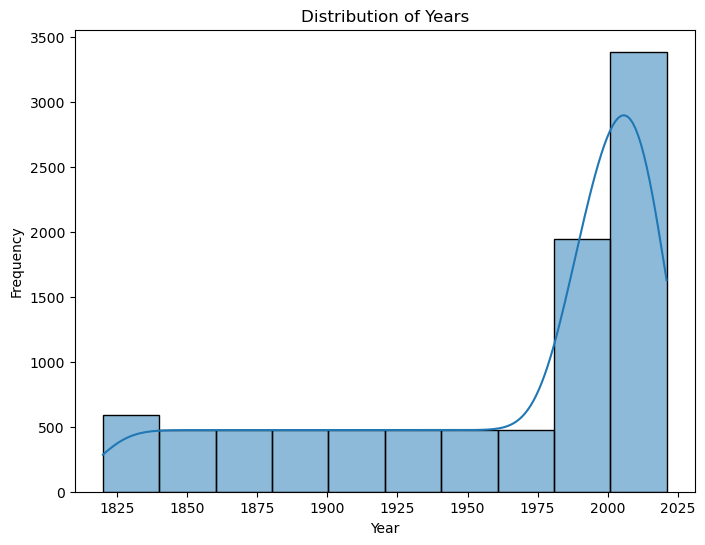

In [23]:
# 1. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Year', bins=10, kde=True)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

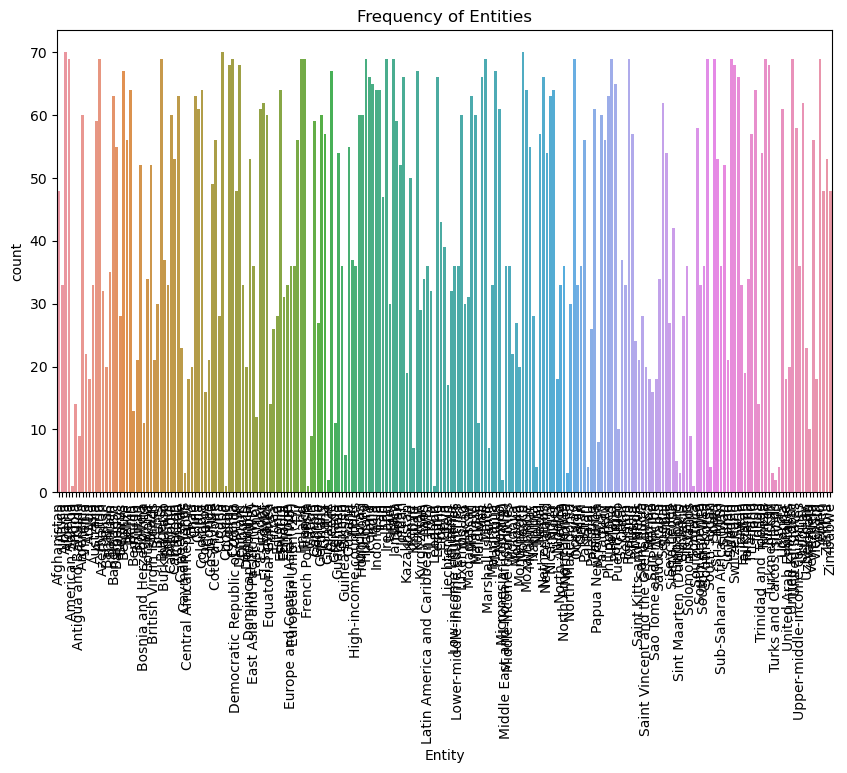

In [24]:
# 2. Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Entity')
plt.title('Frequency of Entities')
plt.xticks(rotation=90)
plt.show()

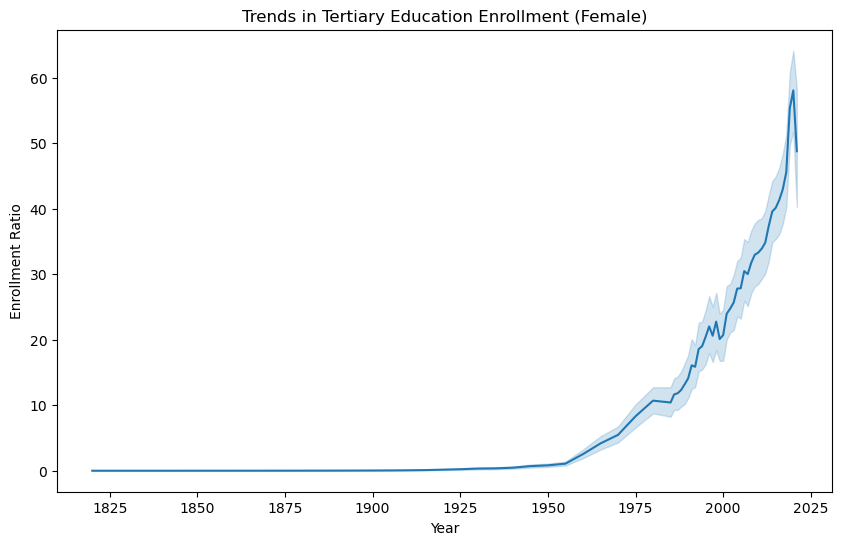

In [25]:
# 3. Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Combined gross enrolment ratio for tertiary education, female')
plt.title('Trends in Tertiary Education Enrollment (Female)')
plt.xlabel('Year')
plt.ylabel('Enrollment Ratio')
plt.show()

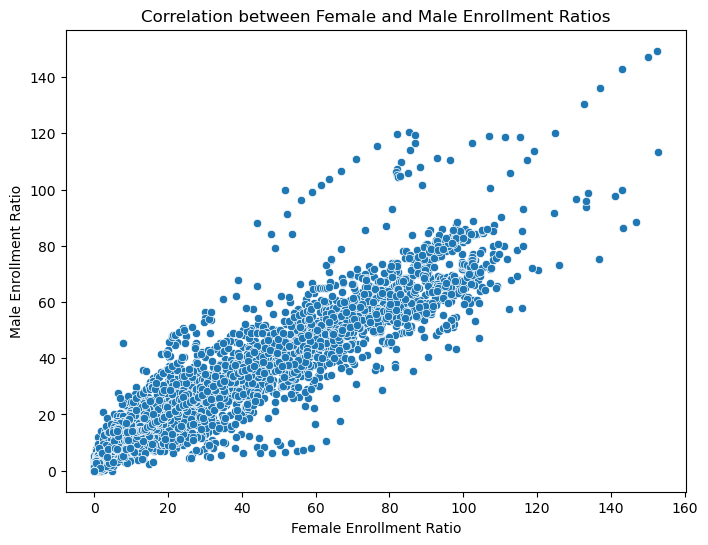

In [26]:
# 4. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Combined gross enrolment ratio for tertiary education, female', y='Combined gross enrolment ratio for tertiary education, male')
plt.title('Correlation between Female and Male Enrollment Ratios')
plt.xlabel('Female Enrollment Ratio')
plt.ylabel('Male Enrollment Ratio')
plt.show()